# training on existing Data

In [7]:
import numpy as np
import cv2 
import os
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
labels_dic = {
    "aleff": 0, #أ
    "bb": 1,    #ب
    "taa": 2,   #ت
    "thaa": 3,  #ث
    "jeem": 4,  #ج
    "haa": 5,   #ح
    "khaa": 6,  #خ
    "dal": 7,   #د
    "thal": 8,  #ذ
    "ra": 9,    #ر
    "zay": 10,  #ز
    "seen": 11, #س
    "sheen": 12,#ش
    "saad": 13, #ص
    "dhad": 14, #ض
    "ta": 15,   #ط
    "dha": 16,  #ظ
    "ain": 17,  #ع
    "ghain": 18,#غ
    "fa": 19,   #ف
    "gaaf": 20, #ق
    "kaaf": 21, #ك
    "laam": 22, #ل
    "meem": 23, #م
    "nun": 24,  #ن
    "ha": 25,   #هـ
    "waw": 26,  #و
    "ya": 27,   #ئ
    "toot": 28, #ة
    "al": 29,   #ال
    "la": 30,   #لا
    "yaa": 31   #ي
}

data = np.load(os.path.join("keypoints","data.npy"))
labels = np.load(os.path.join("keypoints","labels.npy"))

perm = np.random.permutation(len(data))

data = data[perm]
labels = labels[perm]




In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping

# v1 ->95% training , 88% validation,84% test
# v1 =  os.path.join("final_train_weights","first_model_V1.h5")
best_model_file_name = os.path.join("weights","V1.h5")


checkpoint = ModelCheckpoint(os.path.join(best_model_file_name), monitor='loss', verbose=0,
    save_best_only=True, mode='auto', save_freq=1)
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [16]:
def first_model():
    input_layer = Input(shape=(42,))
    layer = Dense(128,activation="relu")(input_layer)
    layer = Dense(256,activation="relu")(layer)
    layer = Dense(128,activation="relu")(layer)
    layer = Dense(len(labels_dic),activation="softmax")(layer)

    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = first_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense_1 (Dense)             (None, 128)               5504      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
Total params: 75,552
Trainable params: 75,552
Non-trainable params: 0
_________________________________________________________________


2022-04-14 15:04:33.645069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 15:04:33.645640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-14 15:04:33.645748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-14 15:04:33.645837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublas

In [17]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[checkpoint,earlyStopping],validation_data=(X_test,y_test),batch_size=16)

Epoch 1/100
816/816 [==============================] - 15s 18ms/step - loss: 1.9876 - accuracy: 0.3855 - val_loss: 0.8931 - val_accuracy: 0.7320
Epoch 2/100
816/816 [==============================] - 9s 11ms/step - loss: 0.6106 - accuracy: 0.8014 - val_loss: 0.4199 - val_accuracy: 0.8949
Epoch 3/100
816/816 [==============================] - 4s 4ms/step - loss: 0.3152 - accuracy: 0.9049 - val_loss: 0.2723 - val_accuracy: 0.9240
Epoch 4/100
816/816 [==============================] - 1s 866us/step - loss: 0.2283 - accuracy: 0.9289 - val_loss: 0.2627 - val_accuracy: 0.9240
Epoch 5/100
816/816 [==============================] - 1s 922us/step - loss: 0.1747 - accuracy: 0.9488 - val_loss: 0.2669 - val_accuracy: 0.9201
Epoch 6/100
816/816 [==============================] - 1s 860us/step - loss: 0.1688 - accuracy: 0.9509 - val_loss: 0.1564 - val_accuracy: 0.9631
Epoch 7/100
816/816 [==============================] - 1s 856us/step - loss: 0.1663 - accuracy: 0.9491 - val_loss: 0.1637 - val_accur

816/816 [==============================] - 1s 856us/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.1954 - val_accuracy: 0.9544
Epoch 58/100
816/816 [==============================] - 1s 859us/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.1087 - val_accuracy: 0.9870
Epoch 59/100
816/816 [==============================] - 1s 867us/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.1366 - val_accuracy: 0.9748
Epoch 60/100
816/816 [==============================] - 1s 862us/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.1072 - val_accuracy: 0.9891
Epoch 61/100
816/816 [==============================] - 1s 875us/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0905 - val_accuracy: 0.9935
Epoch 62/100
816/816 [==============================] - 1s 871us/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.1093 - val_accuracy: 0.9822
Epoch 63/100
816/816 [==============================] - 1s 871us/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0971 - val_accuracy

In [9]:
model.save_weights(os.path.join(best_model_file_name))

In [21]:
print(
    model.evaluate(X_train,y_train),
    model.evaluate(X_test,y_test)
)

72/72 [==============================] - 0s 498us/step - loss: 0.0979 - accuracy: 0.9935
[0.008962082676589489, 0.9967796206474304] [0.09788666665554047, 0.9934839010238647]


In [11]:
model.save_weights(os.path.join(best_model_file_name))

In [20]:
model.load_weights(os.path.join(best_model_file_name))

# evaluation


- write matplotlib code to display both of them
- then write function to display history and evaluation just one time

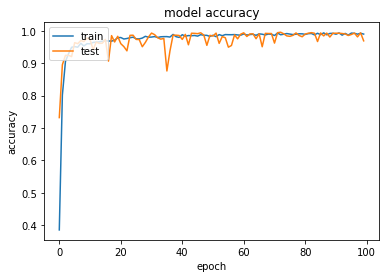

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

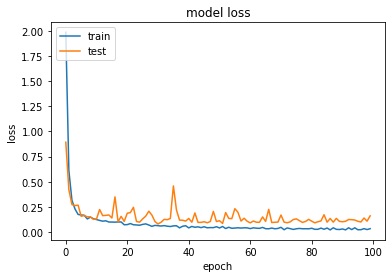

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [1.7010161876678467, 0.800000011920929]
class : 1:hurry --> [0.0001951986487256363, 1.0]
class : 2:hungry --> [0.00013828328519593924, 1.0]
class : 3:meal --> [0.1749543994665146, 0.9473684430122375]
class : 4:brother --> [0.7396684885025024, 0.8500000238418579]
class : 5:tree --> [0.2636032998561859, 0.8999999761581421]
class : 6:heavy --> [1.7032395601272583, 0.8461538553237915]
class : 7:cry --> [0.13189388811588287, 0.949999988079071]
class : 8:family --> [2.2531592549057677e-05, 1.0]
class : 9:wise --> [0.39396458864212036, 0.9473684430122375]


In [23]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V1.h5"))

In [24]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [2.1439902782440186, 0.699999988079071]
class : 1:hurry --> [0.4425128996372223, 0.7894737124443054]
class : 2:hungry --> [0.23317945003509521, 0.8999999761581421]
class : 3:meal --> [0.05305203050374985, 0.9473684430122375]
class : 4:brother --> [0.9514178037643433, 0.699999988079071]
class : 5:tree --> [0.7925909757614136, 0.8500000238418579]
class : 6:heavy --> [0.0105934152379632, 1.0]
class : 7:cry --> [0.003288751933723688, 1.0]
class : 8:family --> [3.0288221751106903e-05, 1.0]
class : 9:wise --> [0.17635352909564972, 0.8947368264198303]


In [21]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V2.h5"))

In [22]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [0.825576663017273, 0.8500000238418579]
class : 1:hurry --> [0.01183120533823967, 1.0]
class : 2:hungry --> [0.11262451112270355, 0.949999988079071]
class : 3:meal --> [0.5067373514175415, 0.8947368264198303]
class : 4:brother --> [1.662697434425354, 0.800000011920929]
class : 5:tree --> [0.34248995780944824, 0.8999999761581421]
class : 6:heavy --> [0.028256479650735855, 1.0]
class : 7:cry --> [0.06529584527015686, 1.0]
class : 8:family --> [0.0009215319296345115, 1.0]
class : 9:wise --> [0.23732376098632812, 0.8947368264198303]


In [ ]:
model = second_model()
model.load_weights(os.path.join("final_train_weights","second_model_V1.h5"))

In [18]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [1.455183744430542, 0.75]
class : 1:hurry --> [0.24843087792396545, 0.8421052694320679]
class : 2:hungry --> [1.4502105712890625, 0.75]
class : 3:meal --> [0.39883410930633545, 0.8947368264198303]
class : 4:brother --> [0.8388317823410034, 0.800000011920929]
class : 5:tree --> [1.0407341718673706, 0.800000011920929]
class : 6:heavy --> [0.010108273476362228, 1.0]
class : 7:cry --> [0.0016583595424890518, 1.0]
class : 8:family --> [0.005287606734782457, 1.0]
class : 9:wise --> [0.2445170283317566, 0.9473684430122375]
